<a href="https://colab.research.google.com/github/Basel-Dawoud/AI-Diabetes-Prediction/blob/main/Basel_Ahmed_Dawoud_AI_G4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the dataset

In [132]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

diabetes_data_frame = pd.read_csv('diabetes.csv')

diabetes_data_frame.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploring Data


In [76]:
print(df.describe())
print("------------------------------------------------------------------------")
print(df.info())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

# Preprocess the Data

In [133]:
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replacing zeros with NAN (columns that should not have zero values)
diabetes_data_frame[columns_with_zeros] = diabetes_data_frame[columns_with_zeros].replace(0, np.nan)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# print(diabetes_data_frame.isnull().sum())
# print(diabetes_data_frame.dtypes)

# Filling missing values with the median
diabetes_data_frame.fillna(diabetes_data_frame.median(), inplace=True)

# Convert DataFrame to NumPy array
data = diabetes_data_frame.to_numpy()

# Separate features and targets "x => features" & "y => targets (outcome)"
X = data[:, :-1]
y = data[:, -1]

# Visualization

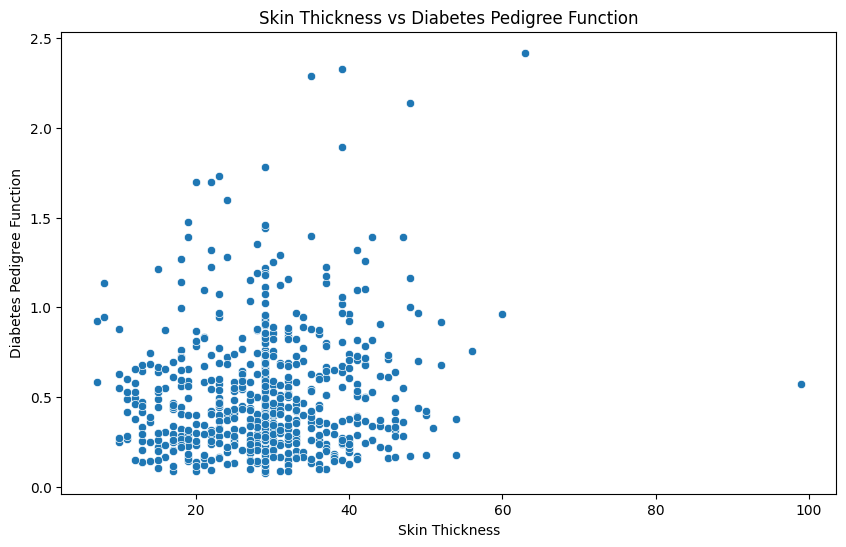

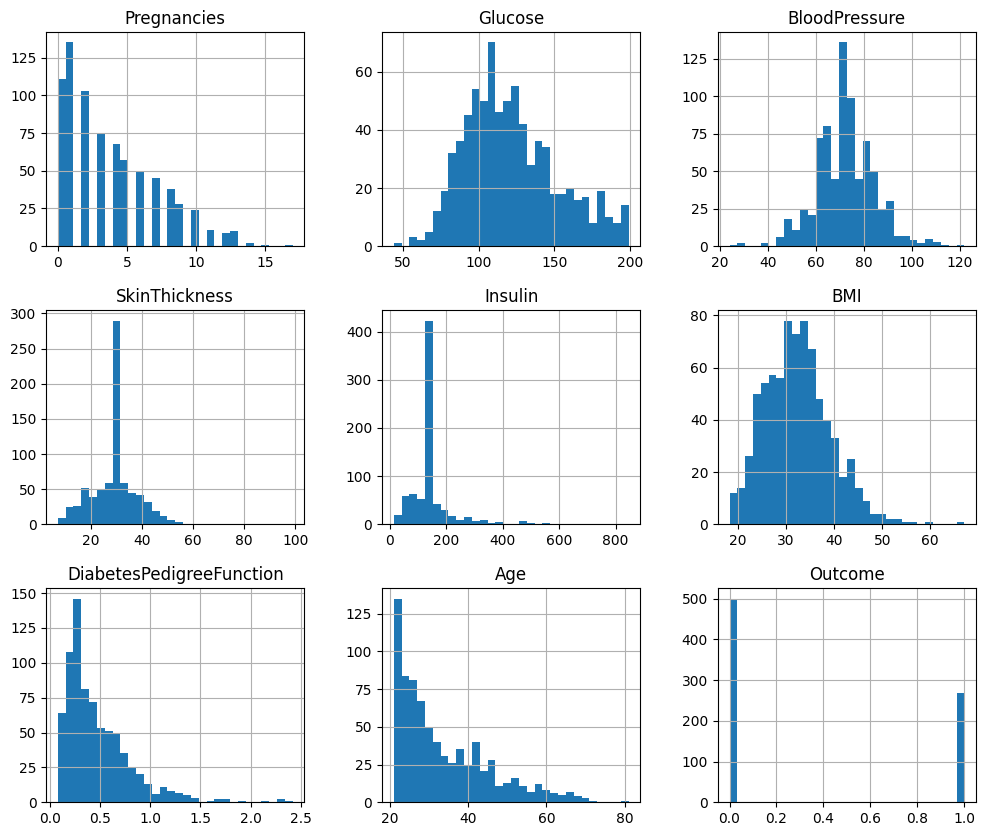

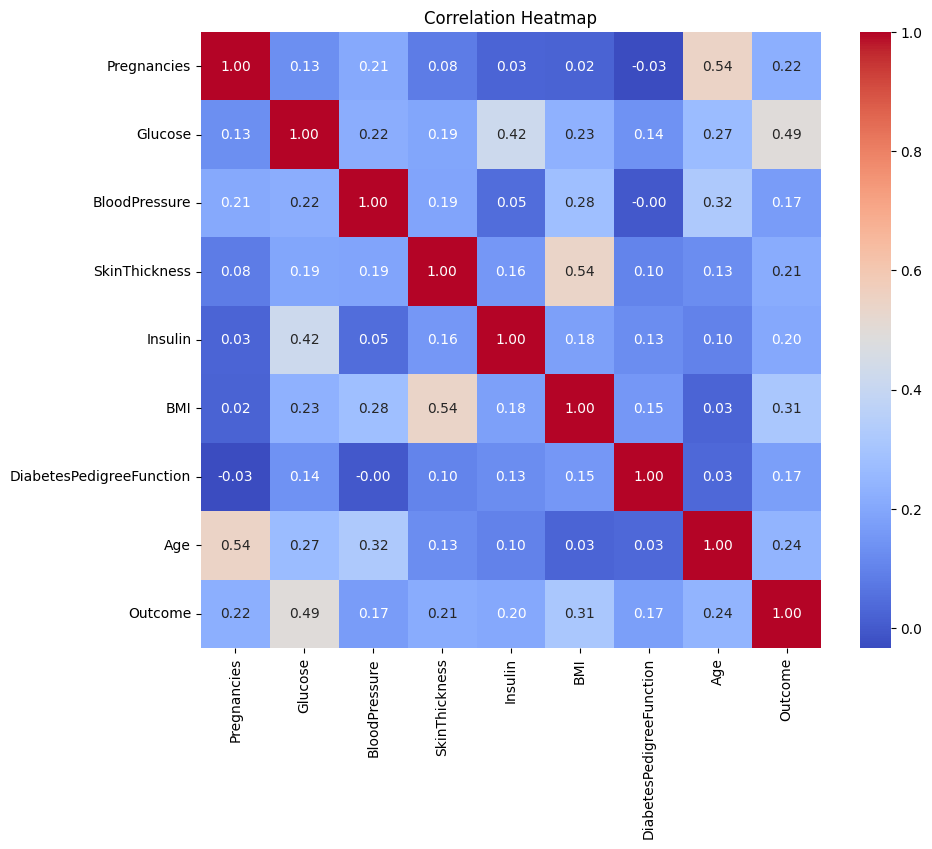

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

### Bounus Question
# Visualize the relationship between Skin Thickness and Diabetes Pedigree Function
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SkinThickness', y='DiabetesPedigreeFunction', data=diabetes_data_frame)
plt.title('Skin Thickness vs Diabetes Pedigree Function')
plt.xlabel('Skin Thickness')
plt.ylabel('Diabetes Pedigree Function')
plt.show()

# Plot histogram of features
diabetes_data_frame.hist(bins=30, figsize=(12, 10))
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_data_frame.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Regression Task


## Data Preparation

In [160]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Separate features and target for regression
X = diabetes_data_frame.drop('DiabetesPedigreeFunction', axis=1)  # Features
y_reg = diabetes_data_frame['DiabetesPedigreeFunction']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)


## Linear Regression

In [161]:
# Train the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Predict on the test set
y_reg_pred = linear_reg_model.predict(X_test)

# Calculate Mean Squared Error
mse_linear = mean_squared_error(y_test, y_reg_pred)

# R^2 Score
r2 = r2_score(y_test, y_reg_pred)

# Print the results for Linear Regression
print(f'Mean Squared Error for Linear Regression: {mse_linear}')
print("---------------------------------------------------------------")
print(f'R^2 Score for Linear Regression: {r2}')
print("---------------------------------------------------------------")
print(f'Linear Regression Coefficients: {linear_reg_model.coef_}')


Mean Squared Error for Linear Regression: 0.08778590716347096
---------------------------------------------------------------
R^2 Score for Linear Regression: 0.07551176904020585
---------------------------------------------------------------
Linear Regression Coefficients: [-0.00499898  0.00068775 -0.00099753  0.00114922  0.00020453  0.00503747
  0.00021122  0.06302597]


## Ridge Regression

In [162]:
# Initialize and train Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_model.fit(X_train, y_train)

# Predict and evaluate with Ridge Regression
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Print the results for Ridge Regression
print(f'Mean Squared Error for Ridge Regression: {mse_ridge}')
print("---------------------------------------------------------------")
print(f'Ridge Coefficients: {ridge_model.coef_}')

Mean Squared Error for Ridge Regression: 0.08780905294206655
---------------------------------------------------------------
Ridge Coefficients: [-0.00499082  0.00069203 -0.00099877  0.00114988  0.0002044   0.00504782
  0.00021488  0.06236823]


## Lasso Regression

In [165]:
# Initialize and train Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso_model.fit(X_train, y_train)

# Predict and evaluate with Lasso Regression
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Print the results for Lasso Regression
print(f'Mean Squared Error for Lasso Regression: {mse_lasso}')
print("---------------------------------------------------------------")
print(f'Lasso Coefficients: {lasso_model.coef_}')


Mean Squared Error for Lasso Regression: 0.09212414091077874
---------------------------------------------------------------
Lasso Coefficients: [-0.00000000e+00  9.75890006e-04 -7.91526396e-06  3.51304298e-04
  2.31879905e-04  4.02804469e-03 -0.00000000e+00  0.00000000e+00]


## Comparison of the Linear, Ridge, and Lasso Regression models

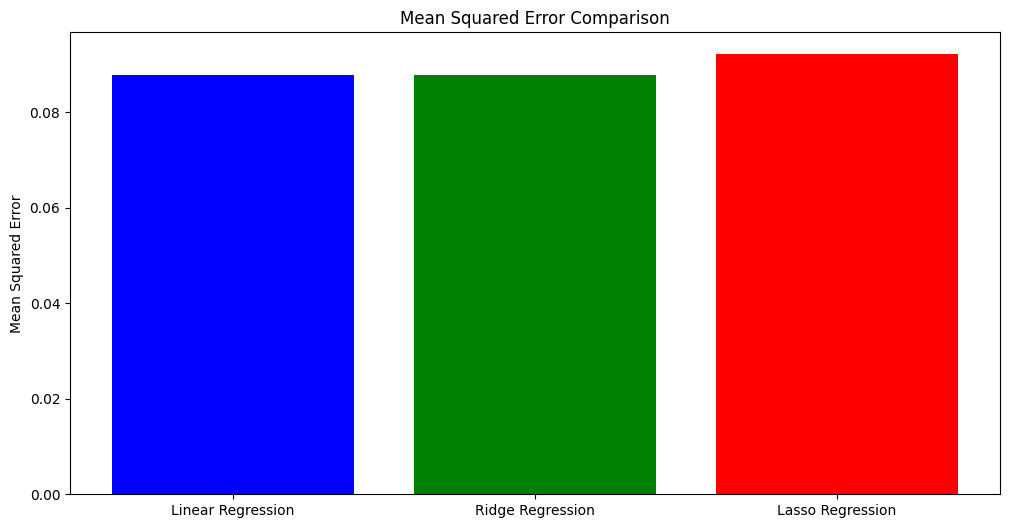

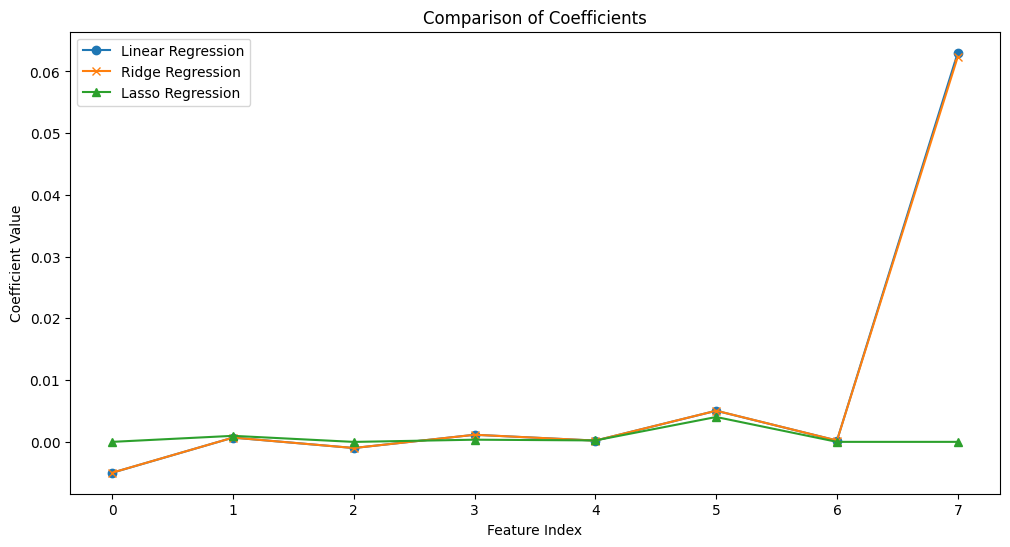

In [166]:
# Plot MSE
plt.figure(figsize=(12, 6))
plt.title('Mean Squared Error Comparison')
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
mse_values = [mse_linear, mse_ridge, mse_lasso]
plt.bar(models, mse_values, color=['blue', 'green', 'red'])
plt.ylabel('Mean Squared Error')
plt.show()

# Plot Coefficients
# Coefficients
coefficients_linear = linear_reg_model.coef_
coefficients_ridge = ridge_model.coef_
coefficients_lasso = lasso_model.coef_

plt.figure(figsize=(12, 6))
plt.plot(coefficients_linear, label='Linear Regression', marker='o')
plt.plot(coefficients_ridge, label='Ridge Regression', marker='x')
plt.plot(coefficients_lasso, label='Lasso Regression', marker='^')
plt.title('Comparison of Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()

### Mean Squared Error (MSE) Comparison
- **Linear Regression**: Lowest MSE
- **Ridge Regression**: Slightly higher MSE than Linear Regression
- **Lasso Regression**: Highest MSE

### Coefficient Values Comparison
- **Linear Regression**: Moderate coefficient values
- **Ridge Regression**: Similar to Linear Regression but slightly more regularized
- **Lasso Regression**: Higher coefficient values, indicating more significant feature selection

### Conclusion
- **If you prioritize lower error**: Linear Regression seems to be the best choice as it has the lowest MSE.
- **If you prioritize feature selection and regularization**: Lasso Regression might be better despite its higher MSE, as it can help in identifying the most important features.


# Classification Task (Outcome Prediction)

## Brief Description

K-Nearest Neighbors (KNN) is a simple and intuitive classification algorithm used to classify data points based on their proximity to other data points in the feature space. The key idea behind KNN is to predict the class of a data point by looking at the classes of its K-nearest neighbors, where K is a user-defined parameter. The class that appears most frequently among the neighbors is assigned to the data point.

**Application to Diabetes Dataset:**

In the diabetes dataset, KNN can be used to classify patients into "high risk" or "low risk" categories for diabetes based on their medical measurements (features). The algorithm evaluates the risk status by considering the classes of the nearest patients in the feature space.

**Performance:**

- **Advantages:**
  - Simple to understand and implement.
  - No assumption about the underlying data distribution, making it flexible for various types of data.

- **Disadvantages:**
  - **Computationally Intensive:** The algorithm can be slow, especially with large datasets, since it requires calculating distances for each prediction.
  - **Sensitive to Feature Scaling:** The performance can be affected if the features are not normalized or scaled.
  - **Class Bias:** KNN might be biased towards classes that have a higher frequency in the training data or those that are closer to the query point.

**Evaluation:**

The performance of the KNN classifier can be evaluated using accuracy metrics, confusion matrix, and classification reports. These metrics provide insight into how well the model differentiates between high-risk and low-risk patients and whether it correctly identifies diabetes status.


## KNN from scratch implementation

In [141]:
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn import datasets
from collections import Counter

# Load Iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                      columns=iris['feature_names'] + ['target'])

# Split data into features and target
x = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=0)
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

# Normalize the data
scaler = Normalizer().fit(x_train)
normalized_x_train = scaler.transform(x_train)
normalized_x_test = scaler.transform(x_test)

# Function to calculate Euclidean distance
def distance_ecu(x_train, x_test_point):
    distances = []
    for row in range(len(x_train)):
        current_train_point = x_train[row]
        current_distance = 0
        for col in range(len(current_train_point)):
            current_distance += (current_train_point[col] - x_test_point[col]) ** 2
        current_distance = np.sqrt(current_distance)
        distances.append(current_distance)
    distances = pd.DataFrame(data=distances, columns=['dist'])
    return distances

# Function to find nearest neighbors
def nearest_neighbors(distance_point, K):
    df_nearest = distance_point.sort_values(by=['dist'], axis=0)
    df_nearest = df_nearest[:K]
    return df_nearest

# Function for majority voting
def voting(df_nearest, y_train):
    counter_vote = Counter(y_train[df_nearest.index])
    y_pred = counter_vote.most_common()[0][0]
    return y_pred

# KNN from scratch implementation
def KNN_from_scratch(x_train, y_train, x_test, K):
    y_pred = []
    for x_test_point in x_test:
        distance_point = distance_ecu(x_train, x_test_point)
        df_nearest_point = nearest_neighbors(distance_point, K)
        y_pred_point = voting(df_nearest_point, y_train)
        y_pred.append(y_pred_point)
    return y_pred

## Classify Patients using KNN

In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for classification
X = diabetes_data_frame.drop('Outcome', axis=1)  # Features
y = diabetes_data_frame['Outcome']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # n_neighbors can be tuned
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.2f}')

# Classification Report
print("\n")
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.68


Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        99
           1       0.54      0.62      0.58        55

    accuracy                           0.68       154
   macro avg       0.65      0.66      0.66       154
weighted avg       0.69      0.68      0.68       154



## Classification using Deep Learning

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.4304 - loss: 5.0182 - val_accuracy: 0.4228 - val_loss: 1.2618
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5867 - loss: 1.1057 - val_accuracy: 0.6260 - val_loss: 1.2444
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5932 - loss: 0.8922 - val_accuracy: 0.5772 - val_loss: 0.7956
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5879 - loss: 0.8407 - val_accuracy: 0.6016 - val_loss: 1.0423
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6286 - loss: 0.8356 - val_accuracy: 0.6423 - val_loss: 0.7147
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6970 - loss: 0.6854 - val_accuracy: 0.6016 - val_loss: 0.7302
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7070 - loss: 0.5860 - val_accuracy: 0.6179 - val_loss: 0.6752
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6969 - loss: 0.5760 - val_accuracy: 0.6260 - val_los

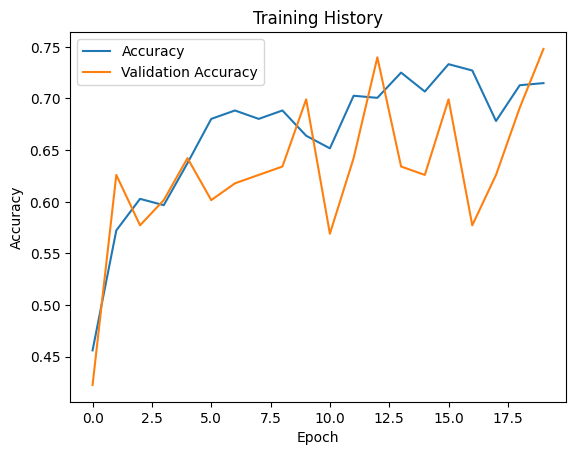

In [167]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Convert to NumPy arrays
X = diabetes_data_frame.drop('Outcome', axis=1).values
y = diabetes_data_frame['Outcome'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer specifying input shape
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy_dl = model.evaluate(X_test, y_test, verbose=0)
print(f'DL Accuracy: {accuracy_dl:.2f}')

# Plot training history
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training History')
plt.legend()
plt.show()

# Clustering Patients using K-Means

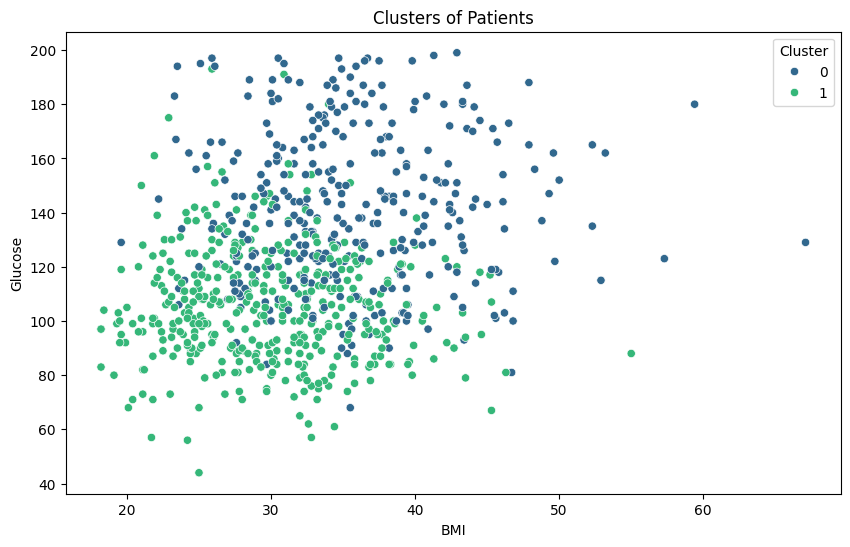

In [168]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Fit K-Means model
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)  # Specify n_init explicitly
kmeans.fit(X_scaled)

# Get cluster labels
clusters = kmeans.labels_

# Add cluster labels to the original DataFrame
diabetes_data_frame['Cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Glucose', hue='Cluster', data=diabetes_data_frame, palette='viridis')
plt.title('Clusters of Patients')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.show()
